# Fast Poisson Solver

Instead of solving the problem in the spacial domain one can transfer it to there frequency domain and solve it by applying the DFT: 
\begin{gather*}
\begin{matrix}
\textbf{space domain} & & \textbf{frequency domain}\\
\text{problem} & \to & \text{problem}\\
\vdots & \textbf{DST/DCT} & \downarrow\\
\text{solution} & \leftarrow & \text{solution}
\end{matrix}
\end{gather*}

Let us consider the following Poisson equation: 
\begin{gather}
f(x) = - \lambda \frac{\partial^2 u(x)}{\partial x^2}
\end{gather}
The analytic solution is given by:
\begin{gather}
u(x) = \int_1^x \int_1^\xi f(\eta) d \eta d\xi + c_2 x + c_1, \quad u_0 = u_n = 0
\end{gather}



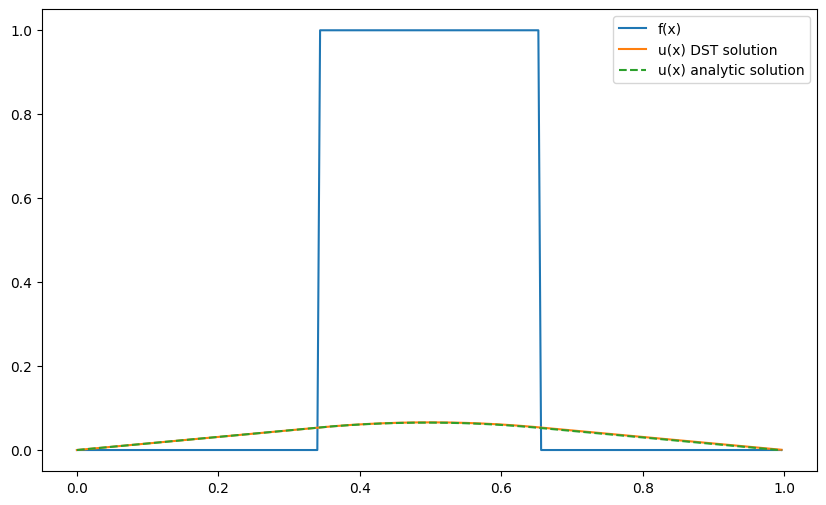

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import time

f = np.zeros(2**8)
N = np.size(f)

h = 1/N
x = np.arange(0,1,h)

# Set heat source: 
f[int(N/2)-40:int(N/2)+40] = 1

F_dst = 1/N * np.array([np.sum([f[n]*np.sin(np.pi*n*k/N) for n in range(0,N)]) for k in range(1,N)]) 

U_dst = h**2*F_dst/np.array(2-2*np.cos(np.pi*np.arange(1,N)/N))

u = 2 * np.array([np.sum([U_dst[k-1]*np.sin(np.pi*n*k/N) for k in range(1,N)]) for n in range(0,N)])

uu = h**2*np.cumsum(np.cumsum(-f))  # Evaluates the double integral
u_analytic = uu - uu[-1]*x          # Requirements satisfying the boundray conditions

plt.figure(figsize=(10,6))
plt.plot(x,f)
plt.plot(x,u)
plt.plot(x,u_analytic,'--')
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.grid = True
plt.legend(['f(x)','u(x) DST solution','u(x) analytic solution'])
plt.show()

## Fast Poisson Solver Fast DST

The DST can be computed in a more efficient way with the FFT algorithm. The algorithm for the fast DST was already introduced in the previous chapter.

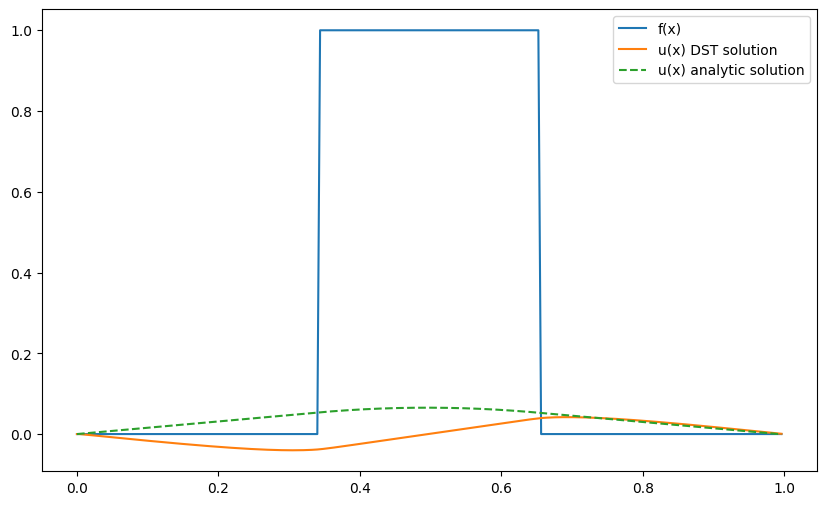

In [97]:
def fastDST(f,inverse):
    N = np.size(f)

    # Extend Data
    f_expand = np.append(f,0)
    f_expand = np.append(f_expand,np.flip(-f[1:]))

    # Compute the real 2N DFT
    F = np.fft.rfft(f_expand)

    # Distinguish between inverse
    a = 1/N if inverse == 0 else 4

    # Convert the N DFT coefficients into the N DST coefficients
    F_tilde = a*np.imag(F[range(0,N)])
    return F_tilde

t = time.time()


F_dst = fastDST(f,0)
U_dst = h**2*F_dst[1:]*1/np.array(2-2*np.cos(np.pi*np.arange(1,N)/N))
u = fastDST(U_dst,1)

plt.figure(figsize=(10,6))
plt.plot(x,f)
plt.plot(x,np.append(0,u))
plt.plot(x,u_analytic,'--')
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.grid = True
plt.legend(['f(x)','u(x) DST solution','u(x) analytic solution'])
plt.show()